## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Naive Bayes

In [1]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [2]:
import os
os.chdir("E:\PGP AIML\Labs\Residency 3\External") 
os.getcwd()
iris = pd.read_csv("Iris.csv", sep=',')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Check dimension of data

In [5]:
iris.shape

(152, 6)

In [6]:
#Check data Type

In [7]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
# Check for NaN/Null values

In [9]:
iris.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

### Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [10]:
iris = iris.fillna(iris.median())

In [11]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.5,3.0,5.20,2.0,Iris-virginica
148,149,6.2,3.4,5.40,2.3,Iris-virginica
149,150,5.9,3.0,5.10,1.8,Iris-virginica
150,151,5.9,3.0,4.35,1.3,Iris-virginica
151,152,5.8,3.0,4.35,1.8,Iris-virginica


In [12]:
Y = iris['Species']
Y.shape

(152,)

In [13]:
X = iris.loc[:, iris.columns != 'Species']
X.shape

(152, 5)

In [14]:
#Check the dataset
print(Y)
print(X)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iris-virginica
135    Iris-virginica
136    Iri

### Find the distribution of target variable (Class) (1 Marks)

In [15]:
iris['Species'].value_counts()

Iris-virginica     52
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Plot the distribution of target variable using histogram

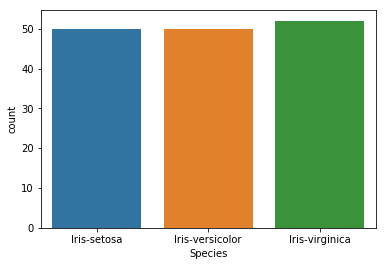

In [16]:
import seaborn as sns

sns.countplot(iris['Species'])

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

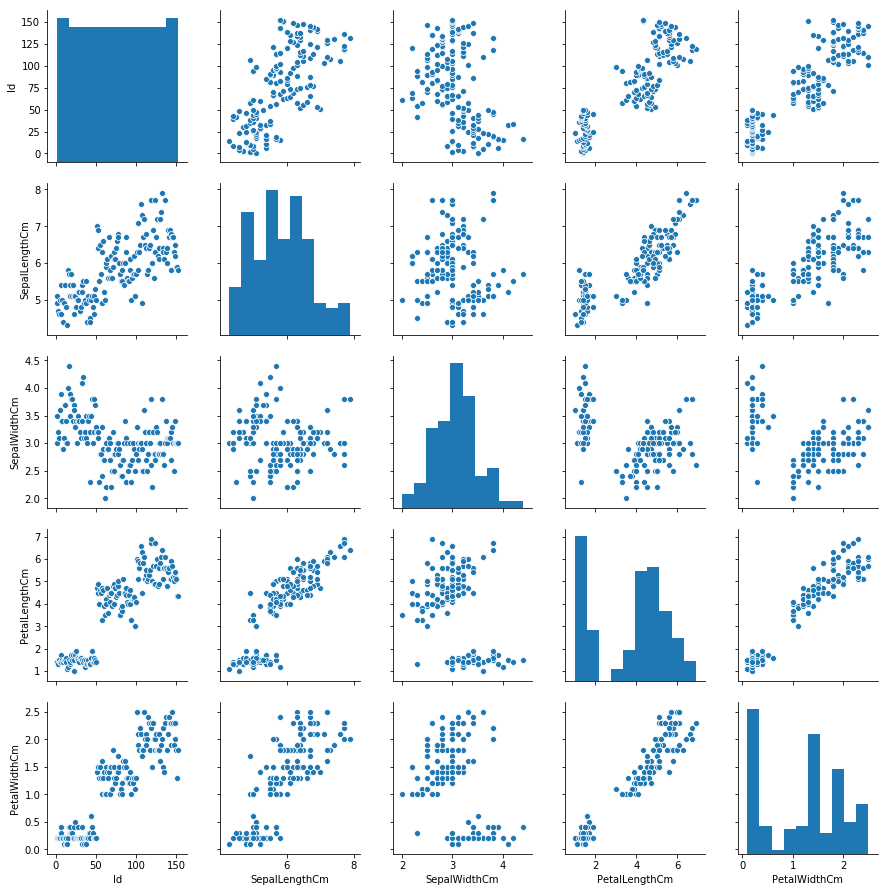

In [17]:
sns.pairplot(iris)

### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [18]:
iris.describe(include = 'all').transpose()

#Mean and Median are almost the same for both SepalLengthCm and SepalWidthCm
#PetalWidthCm has very high standard deviation

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,152,NaN,NaN,NaN,76.5,44.0227,1,38.75,76.5,114.25,152
SepalLengthCm,152,NaN,NaN,NaN,5.84342,0.822584,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,152,NaN,NaN,NaN,3.05329,0.430757,2,2.8,3,3.3,4.4
PetalLengthCm,152,NaN,NaN,NaN,3.76645,1.754,1,1.6,4.35,5.1,6.9
PetalWidthCm,152,NaN,NaN,NaN,1.20329,0.759698,0.1,0.3,1.3,1.8,2.5
Species,152,3,Iris-virginica,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Drop Id variable from data

In [20]:
X = X.drop(['Id'], axis=1)

In [21]:
iris = iris.drop(['Id'], axis=1)

### Correlation among all variables and give your insights (1 Marks)

In [22]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [23]:
#VIF Factor
def VIF(formula,data):
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])]
    return(vif.round(1))

vif=VIF("""Species ~ SepalLengthCm + SepalWidthCm + PetalLengthCm + PetalWidthCm""",iris)
vif

,Variable,VIF
0,Intercept,132.2
1,SepalLengthCm,7.1
2,SepalWidthCm,2.1
3,PetalLengthCm,31.0
4,PetalWidthCm,15.9


In [24]:
#Removing PetalLengthCm because of the high VIF value

In [25]:
#VIF Factor
def VIF(formula,data):
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])]
    return(vif.round(1))

vif=VIF("""Species ~ SepalLengthCm + SepalWidthCm + PetalWidthCm""",iris)
vif

,Variable,VIF
0,Intercept,131.5
1,SepalLengthCm,3.4
2,SepalWidthCm,1.3
3,PetalWidthCm,3.8


### Split data in Training and Validation in 80:20 (1 Marks)

In [26]:
### SPLITTING INTO TRAINING AND TEST SETS

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

### Do Feature Scaling ( 1 Marks)

In [28]:
# Use StandardScaler or similar methods

In [29]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(X_train.values)

scaled_features = sc.transform(X_train.values)

Sclaed_X_train = pd.DataFrame(scaled_features, index=X_train.index, columns=X_train.columns)

In [30]:
from sklearn.preprocessing import StandardScaler

scaled_features1 = sc.transform(X_test.values)

Sclaed_X_test = pd.DataFrame(scaled_features1, index=X_test.index, columns=X_test.columns)

### Train and Fit NaiveBayes Model(2 Marks)

In [31]:
#Fit the model

In [32]:
from sklearn.naive_bayes import BernoulliNB
NB = BernoulliNB()
NB.fit(Sclaed_X_train, Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [33]:
#Predict

In [34]:
XTrainPred = NB.predict(Sclaed_X_train)
XTestPred = NB.predict(Sclaed_X_test)

### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [35]:
# show Confusion Matrix

In [36]:
from sklearn import metrics

print(metrics.confusion_matrix(Y_test, XTestPred))

[[12  0  0]
 [ 0  5  2]
 [ 0  2 10]]


In [37]:
# show accuracy

In [38]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, XTestPred)

0.8709677419354839

In [39]:
#Show precision and Recall metrics

In [40]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [41]:
print(precision_score(Y_test, XTestPred,average='micro'))
print(recall_score(Y_test, XTestPred,average='micro'))

0.8709677419354839
0.8709677419354839


## K-Nearest-Neighbors

# Reload your Iris.Csv and repeat it for KNN using following steps

In [42]:
import warnings 
warnings.filterwarnings('ignore')

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Question 1 - Import Iris.csv

In [43]:
iris2 = pd.read_csv("Iris.csv", sep=',')

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [44]:
iris2 = iris2.fillna(iris.median())

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [45]:
categorical_feature_mask = iris2.dtypes==object
categorical_cols = iris2.columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
iris2[categorical_cols] = iris2[categorical_cols].apply(lambda col: le.fit_transform(col))

In [46]:
iris2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


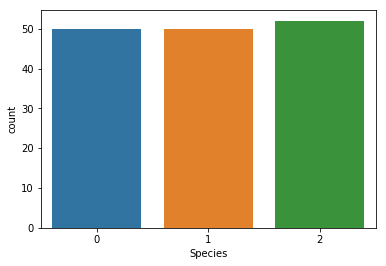

In [47]:
import seaborn as sns

sns.countplot(iris2['Species'])

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [48]:
iris2 = iris2.fillna(iris.median())

#Filling missing values with median

In [49]:
iris2.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.702734,-0.392693,0.872346,0.890676,0.942753
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.942753,0.775061,-0.417318,0.944477,0.952513,1.000000


In [50]:
iris2 = iris2.drop(['PetalLengthCm'], axis=1)

#Removing PetalLengthCm because it has very high correlation with PetalWidthCm

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [51]:
iris2.var()

#No need to drop any variables based on variance as all of them have variance > 0.1

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalWidthCm        0.577141
Species             0.675322
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

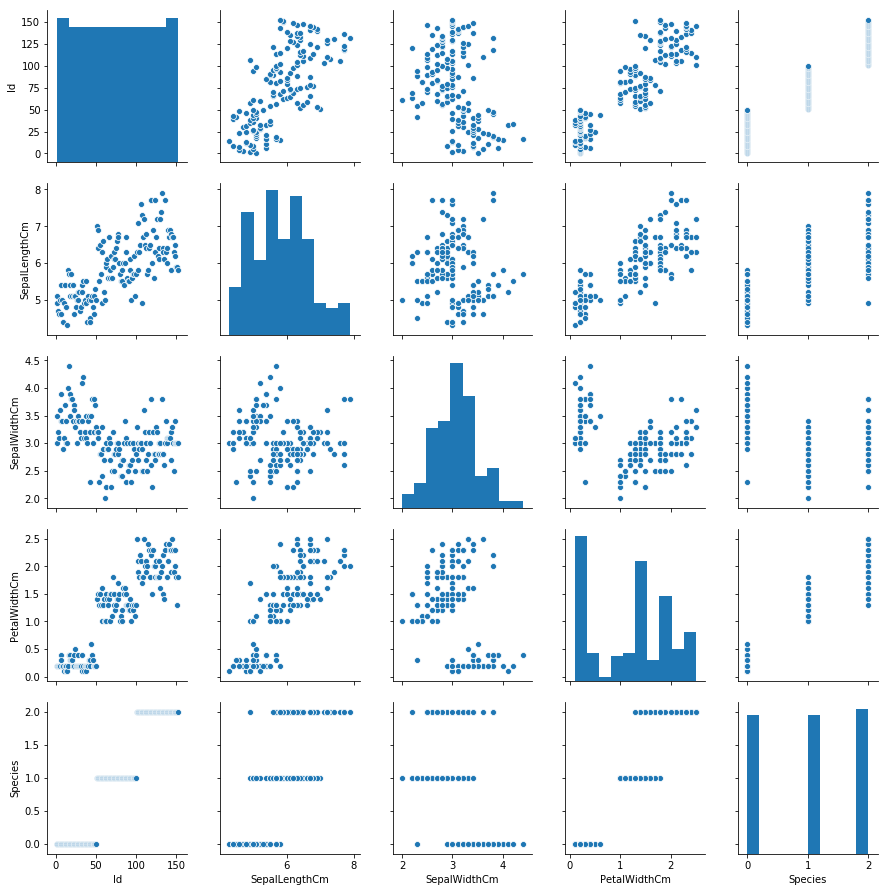

In [52]:
sns.pairplot(iris2)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [53]:
Y = iris2['Species']
Y.shape

(152,)

In [54]:
X = iris2.loc[:, iris2.columns != 'Species']
X.shape

(152, 4)

In [55]:
X = X.drop(['Id'], axis=1)

#Dropping ID column as it is not required.

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [57]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(X_train.values)

scaled_features = sc.transform(X_train.values)

Sclaed_X_train = pd.DataFrame(scaled_features, index=X_train.index, columns=X_train.columns)

In [58]:
from sklearn.preprocessing import StandardScaler

scaled_features1 = sc.transform(X_test.values)

Sclaed_X_test = pd.DataFrame(scaled_features1, index=X_test.index, columns=X_test.columns)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [59]:
from sklearn.neighbors import KNeighborsClassifier

NNH3 = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric = 'euclidean')
NNH5 = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', metric = 'euclidean')
NNH9 = KNeighborsClassifier(n_neighbors = 9, weights = 'uniform', metric = 'euclidean')

In [60]:
NNH3.fit(Sclaed_X_train, Y_train)
NNH5.fit(Sclaed_X_train, Y_train)
NNH9.fit(Sclaed_X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [61]:
XTrainPred3 = NNH3.predict(Sclaed_X_train)
XTestPred3 = NNH3.predict(Sclaed_X_test)

print(accuracy_score(Y_test, XTestPred3),accuracy_score(Y_train, XTrainPred3))

#Test and Train Accuracy for k = 3

0.9032258064516129 0.9586776859504132


In [62]:
XTrainPred5 = NNH5.predict(Sclaed_X_train)
XTestPred5 = NNH5.predict(Sclaed_X_test)

print(accuracy_score(Y_test, XTestPred5),accuracy_score(Y_train, XTrainPred5))

#Test and Train Accuracy for k = 5

0.9032258064516129 0.9669421487603306


In [63]:
XTrainPred9 = NNH9.predict(Sclaed_X_train)
XTestPred9 = NNH9.predict(Sclaed_X_test)

print(accuracy_score(Y_test, XTestPred9),accuracy_score(Y_train, XTrainPred9))

#Test and Train Accuracy for k = 9

0.8709677419354839 0.9586776859504132


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [64]:
from sklearn.model_selection import GridSearchCV

k = np.arange(1,19,2)
knn = KNeighborsClassifier()
parameters = {'n_neighbors' : k}
GS = GridSearchCV(knn, parameters, scoring = 'accuracy', cv=10)

In [65]:
GS.fit(Sclaed_X_train, Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [66]:
GS.best_params_

#Using 3 neighbor gives the lowest MSE 
#(Gave accuracy as the scoring metric for GridSearchCV. Higher Accuracy automatically means lower MSE)

{'n_neighbors': 3}

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

Text(0, 0.5, 'Misclassification Error')

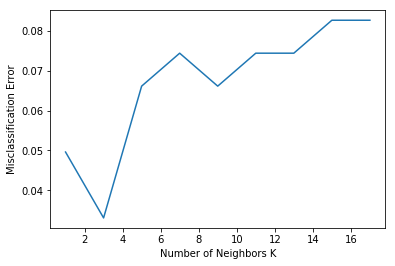

In [67]:
plt.plot(k,1-GS.cv_results_['mean_test_score'])

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

#Subtracting Accuracy from 1 to get MSE